<a href="https://colab.research.google.com/github/hoon-i/ML-with-Math/blob/main/2%ED%95%99%EA%B8%B0%20%EA%B3%BC%EC%A0%9C1(Poly%20Kfold).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [ ]:
#데이터 로드

data = pd.read_csv(r"C:\Users\jhjang\Desktop\concrete_data.csv")

data

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [ ]:
#input, target설정

x = data.drop(columns=['concrete_compressive_strength'])

y = data['concrete_compressive_strength']

In [ ]:
#다항식 차수

degree = [1,2,3,4,5]

result = []


In [ ]:
for i in degree :
    poly = PolynomialFeatures(degree = i)
    X_poly = poly.fit_transform(x)

    #회귀모델
    model = LinearRegression()

    #5fold
    fold = -cross_val_score(model, X_poly, y, cv=5, scoring=('neg_mean_squared_error'))

    #5 fold 의 평균
    mean = np.mean(fold)
    result.append(mean)

    print(f'차수 : {i}, MSE : {mean}')

차수 : 1, MSE : 128.13775612964724
차수 : 2, MSE : 1102.6732520742594
차수 : 3, MSE : 2993.9549352076624
차수 : 4, MSE : 1204900443040902.5
차수 : 5, MSE : 1.0378815846720222e+16


In [ ]:
#최적의 차수 선택
best = np.argmax(result)
best_degree = degree[best]

In [ ]:
print(f'최적 다항식 차수 : {best_degree}')

최적 다항식 차수 : 5


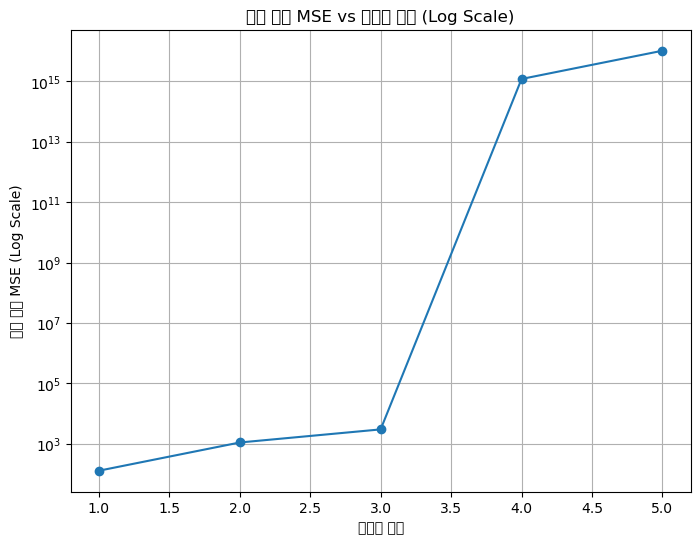

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(degree, result, marker='o')
plt.yscale('log')
plt.title('교차 검증 MSE vs 다항식 차수 (Log Scale)')
plt.xlabel('다항식 차수')
plt.ylabel('교차 검증 MSE (Log Scale)')
plt.grid(True)
plt.show()